# Principal Component Analysis

## Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer


## Importing The Dataset

In [2]:
# iris = load_iris()
# X = pd.DataFrame(iris.data, columns=iris.feature_names)
# y = iris.target
# feature_names = iris.target_names

# dataset  = pd.read_csv('datasets/diabetes.csv')
# feature_names = dataset.columns[:-1]

cancer = load_breast_cancer()
X = pd.DataFrame(
    cancer.data,
    columns=cancer.feature_names
)
y = pd.Series(cancer.target, name='class')

dataset = pd.concat([X, y], axis=1)

In [3]:
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
print(y.unique())

[0 1]


## Correlation Matrix

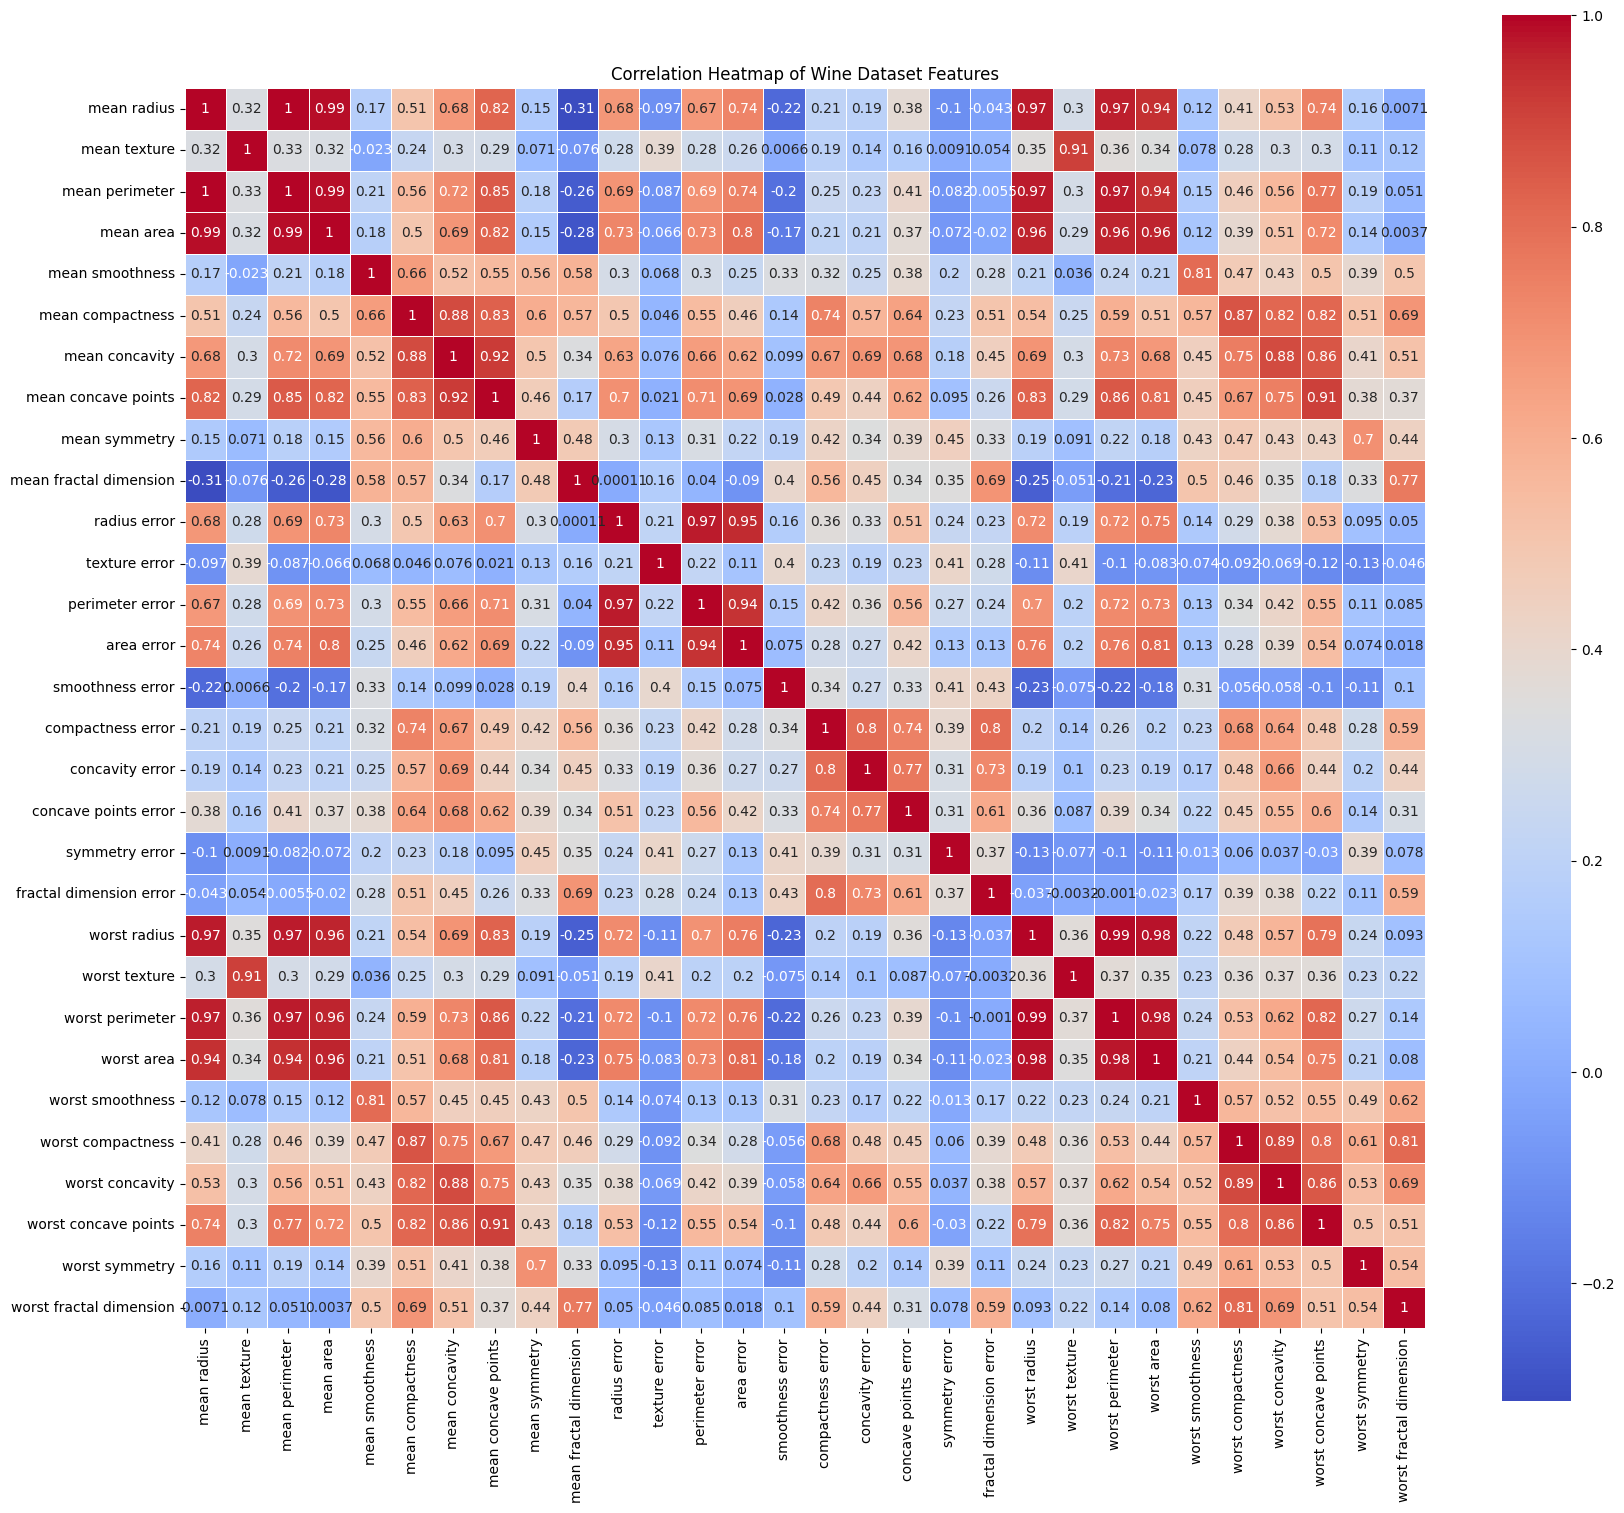

In [5]:
corr_matrix = X.corr()
plt.figure(figsize=(20,18))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=True,
    square=True,
    linewidths=0.5
)
plt.title("Correlation Heatmap of Wine Dataset Features")
plt.show()

In [6]:
# X = dataset.iloc[:, :-1].values
# Y = dataset.iloc[:, -1].values

## Feature Scaling

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## PCA

In [8]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


## Scree Plot

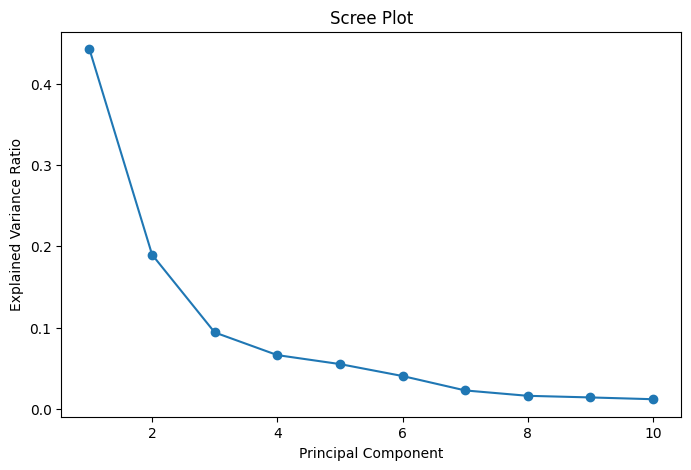

In [9]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11), explained_variance, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()


## Cumulative Explained Variance

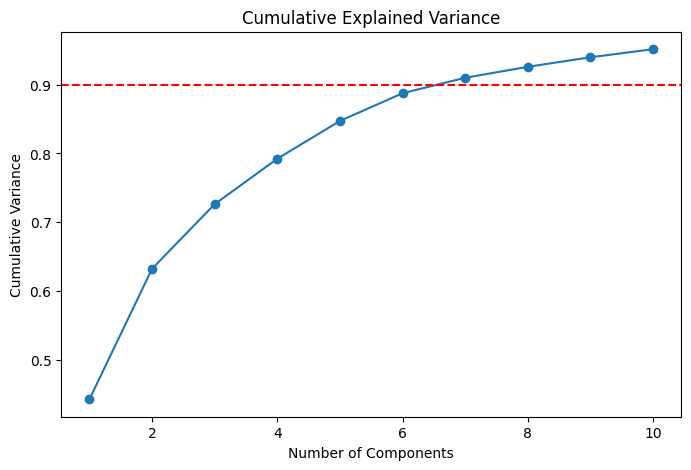

In [10]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11), cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.show()


## PCA 2

In [12]:
# pca_2 = PCA(n_components=2)
# X_2d = pca_2.fit_transform(X_scaled)

# df_pca = pd.DataFrame(X_2d, columns=['PC1', 'PC2'])
# df_pca['target'] = Y


## 2D PCA Projection

In [14]:
# plt.figure(figsize=(8,6))
# sns.scatterplot(
#     x='PC1', y='PC2',
#     hue='target',
#     palette='Set1',
#     data=df_pca,
#     s=80
# )
# plt.title("2D PCA Projection")
# plt.show()

## 3D PCA Projection

NameError: name 'Y' is not defined

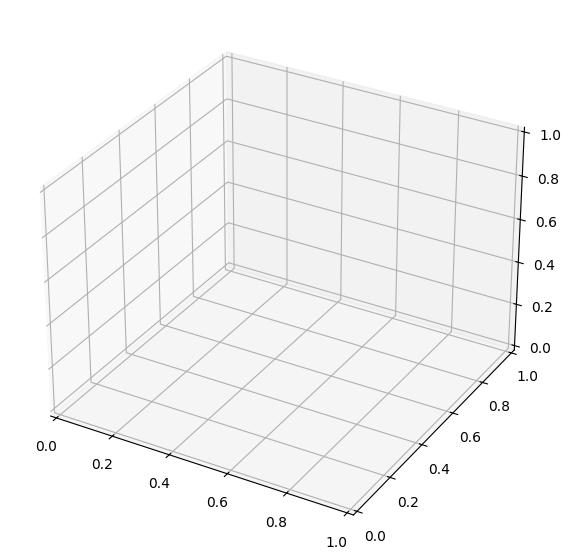

In [15]:
from mpl_toolkits.mplot3d import Axes3D

pca_3 = PCA(n_components=3)
X_3d = pca_3.fit_transform(X_scaled)

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_3d[:,0], X_3d[:,1], X_3d[:,2],
    c=Y, cmap='Set1', s=60
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Projection")
plt.show()


In [16]:
# loadings = pd.DataFrame(
#     pca.components_.T,
#     columns=[f'PC{i+1}' for i in range(pca.n_components_)],
#     index=feature_names
# )

loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,   # ✅ 30 original feature names
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

print(loadings)

                              PC1       PC2       PC3       PC4       PC5  \
mean radius              0.218902 -0.233857 -0.008531 -0.041409 -0.037786   
mean texture             0.103725 -0.059706  0.064550  0.603050  0.049469   
mean perimeter           0.227537 -0.215181 -0.009314 -0.041983 -0.037375   
mean area                0.220995 -0.231077  0.028700 -0.053434 -0.010331   
mean smoothness          0.142590  0.186113 -0.104292 -0.159383  0.365089   
mean compactness         0.239285  0.151892 -0.074092 -0.031795 -0.011704   
mean concavity           0.258400  0.060165  0.002734 -0.019123 -0.086375   
mean concave points      0.260854 -0.034768 -0.025564 -0.065336  0.043861   
mean symmetry            0.138167  0.190349 -0.040240 -0.067125  0.305941   
mean fractal dimension   0.064363  0.366575 -0.022574 -0.048587  0.044424   
radius error             0.205979 -0.105552  0.268481 -0.097941  0.154456   
texture error            0.017428  0.089980  0.374634  0.359856  0.191651   

In [20]:
# Identify features with a "significant" contribution (loading > 0.3)
threshold = 0.3
for col in loadings.columns:
    significant_features = loadings[col][loadings[col].abs() > threshold]
    if not significant_features.empty:
        print(f"\n--- {col} Contributors ---")
        print(significant_features.sort_values(ascending=False))


--- PC2 Contributors ---
mean fractal dimension    0.366575
Name: PC2, dtype: float64

--- PC3 Contributors ---
texture error       0.374634
smoothness error    0.308839
Name: PC3, dtype: float64

--- PC4 Contributors ---
worst texture    0.632808
mean texture     0.603050
texture error    0.359856
Name: PC4, dtype: float64

--- PC5 Contributors ---
mean smoothness     0.365089
worst smoothness    0.324435
mean symmetry       0.305941
concavity error    -0.353982
Name: PC5, dtype: float64

--- PC6 Contributors ---
worst symmetry      0.498927
symmetry error      0.490246
mean symmetry       0.356458
smoothness error   -0.342917
worst smoothness   -0.369255
Name: PC6, dtype: float64

--- PC7 Contributors ---
worst fractal dimension    0.374658
area error                 0.346679
perimeter error            0.314640
radius error               0.312490
concave points error      -0.369646
Name: PC7, dtype: float64

--- PC8 Contributors ---
smoothness error    0.573410
texture error      -0

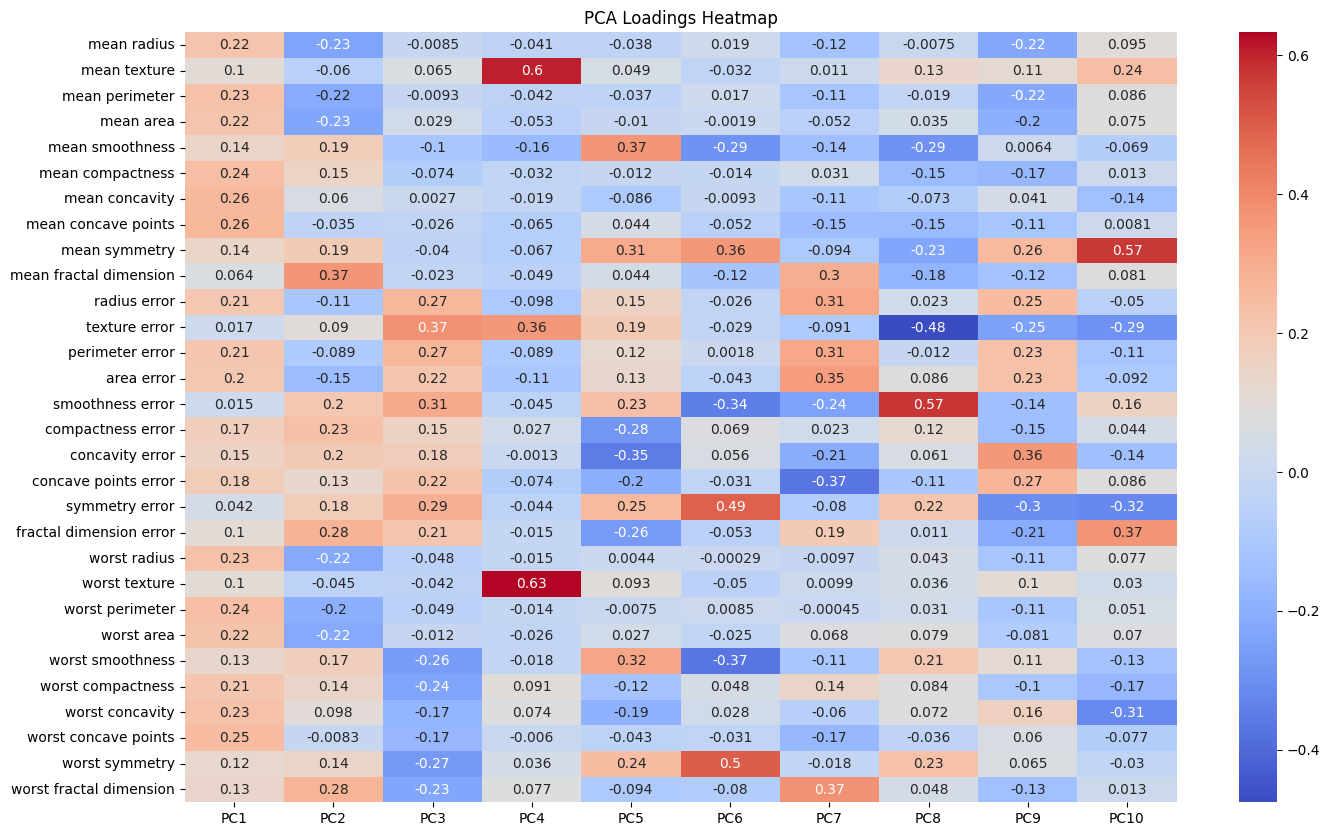

In [187]:
plt.figure(figsize=(16,10))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title("PCA Loadings Heatmap")
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rf = RandomForestClassifier(
    n_estimators=100,      # number of trees
    random_state=42,
    max_depth=None,        # grow fully until pure leaves
    min_samples_split=2
)

# Train on PCA features
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
y_pred = rf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.9580

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        53
           1       0.96      0.98      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



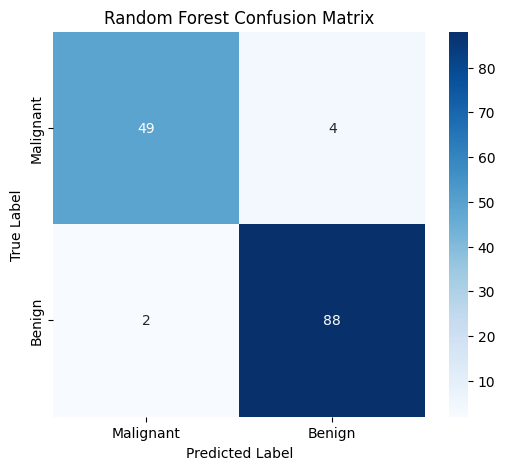

In [25]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant','Benign'],
            yticklabels=['Malignant','Benign'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.show()


=== Random Forest using first 1 PC(s) ===
Accuracy: 0.8741
Confusion Matrix:
 [[47  6]
 [12 78]]


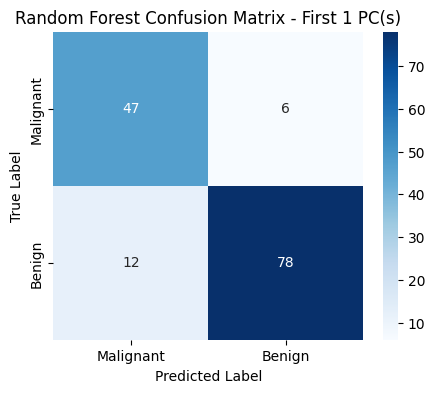


=== Random Forest using first 2 PC(s) ===
Accuracy: 0.9371
Confusion Matrix:
 [[48  5]
 [ 4 86]]


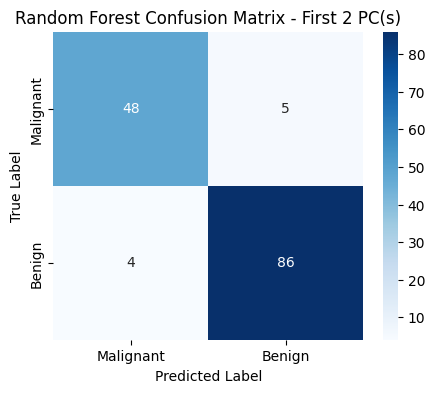


=== Random Forest using first 3 PC(s) ===
Accuracy: 0.9371
Confusion Matrix:
 [[49  4]
 [ 5 85]]


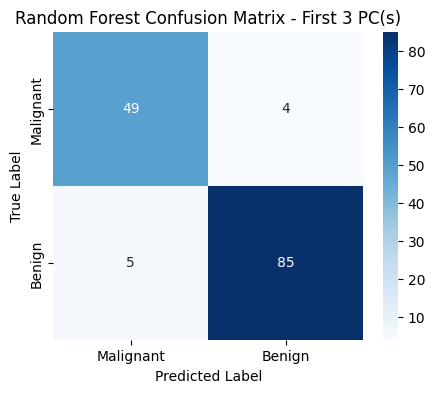


=== Random Forest using first 4 PC(s) ===
Accuracy: 0.9231
Confusion Matrix:
 [[48  5]
 [ 6 84]]


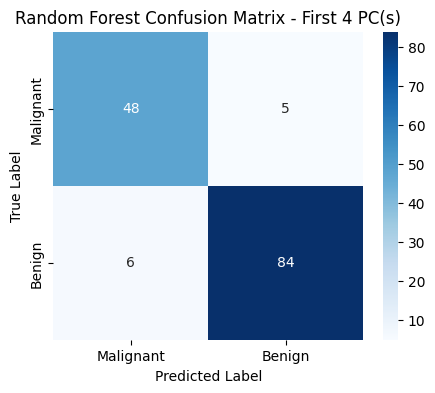


=== Random Forest using first 5 PC(s) ===
Accuracy: 0.9231
Confusion Matrix:
 [[48  5]
 [ 6 84]]


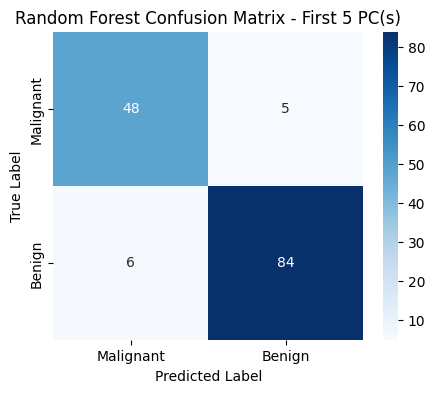


=== Random Forest using first 6 PC(s) ===
Accuracy: 0.9301
Confusion Matrix:
 [[48  5]
 [ 5 85]]


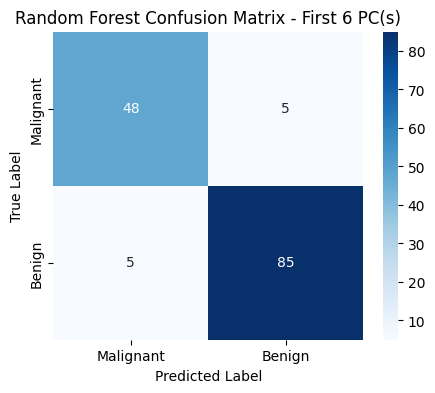


=== Random Forest using first 7 PC(s) ===
Accuracy: 0.9510
Confusion Matrix:
 [[48  5]
 [ 2 88]]


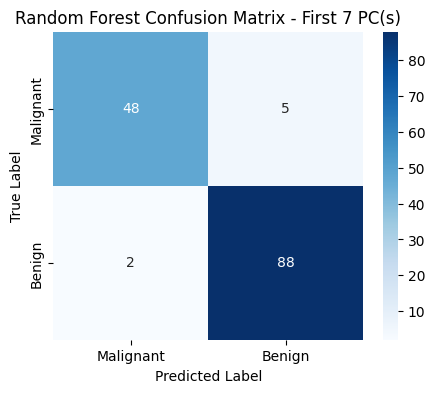


=== Random Forest using first 8 PC(s) ===
Accuracy: 0.9441
Confusion Matrix:
 [[48  5]
 [ 3 87]]


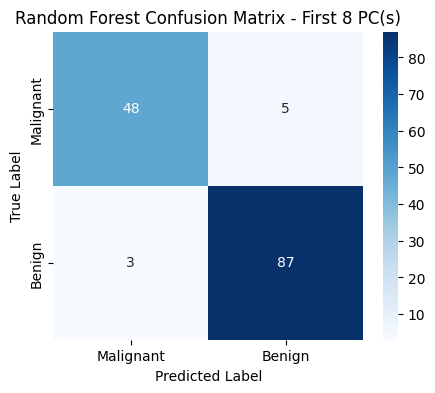


=== Random Forest using first 9 PC(s) ===
Accuracy: 0.9301
Confusion Matrix:
 [[49  4]
 [ 6 84]]


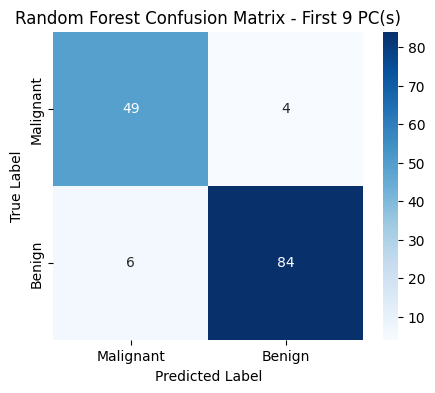


=== Random Forest using first 10 PC(s) ===
Accuracy: 0.9371
Confusion Matrix:
 [[49  4]
 [ 5 85]]


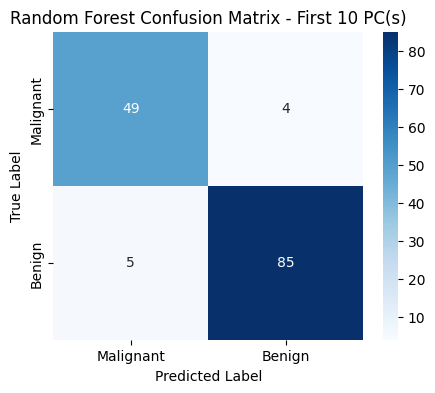

In [26]:
# Split train-test
X_train_full, X_test_full, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42, stratify=y)

# Cumulative Random Forest evaluation
for n_components in range(1, 11):  # 1 to 8
    print(f"\n=== Random Forest using first {n_components} PC(s) ===")
    
    # Select first n_components
    X_train = X_train_full[:, :n_components]
    X_test = X_test_full[:, :n_components]
    
    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Predict
    y_pred = rf.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    
    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Malignant','Benign'],
        yticklabels=['Malignant','Benign']
    )
    plt.title(f"Random Forest Confusion Matrix - First {n_components} PC(s)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()